# Correlação Nota, IDH e População

In [1]:
!pip install pandas_redshift

## Import

### Pandas

Pandas para analisar dados do Redshift
https://pandas.pydata.org/docs/


### pandas_redshift

Para conectar ao redshift e transformar em um dataframe

### Conigparser

Para passar parametros na conexão ao Redshift
https://docs.python.org/3/library/configparser.html

### matplotlib

Para plotar gráficos

### Seaborn

Para melhorar o visual dos gráficos


In [2]:
import pandas as pd
import pandas_redshift as pr
import configparser
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
config = configparser.ConfigParser()
config.read_file(open('dwh.cfg'))

DB_NAME                 = config.get('CLUSTER','DB_NAME')
HOST                 = config.get('CLUSTER','HOST')
DB_PORT                 = config.get('CLUSTER','DB_PORT')
DB_USER                 = config.get('CLUSTER','DB_USER')
DB_PASSWORD                 = config.get('CLUSTER','DB_PASSWORD')

In [4]:
pr.connect_to_redshift(dbname = DB_NAME,
                        host = HOST,
                        port = DB_PORT,
                        user = DB_USER,
                        password = DB_PASSWORD)

### Extrair nota média e idh_municipal

In [5]:
df = pr.redshift_to_pandas('''
select nu_nota_valor, idh_municipal from view_agg_fat_enem vafe
left join staging_cidades sc
on vafe.co_municipio_prova = sc.codigo
order by nu_nota_valor, idh_municipal
''')

In [6]:
df.head()

,nu_nota_valor,idh_municipal
0,315.709779,0.521
1,330.392157,0.574
2,333.035294,0.490
3,360.740741,0.522
4,367.809524,0.498


### Calcular correlação

- Correlação de 0.76, o que indica que cidades com IDH maior possívelmente tem uma nota maior no Enem.


In [7]:
corr = df.corr()
print(corr)

               nu_nota_valor  idh_municipal
nu_nota_valor       1.000000       0.766565
idh_municipal       0.766565       1.000000


### Plotar gráfico

- Gráficos apresentam uma correlação positiva entre IDH e  nota no enem

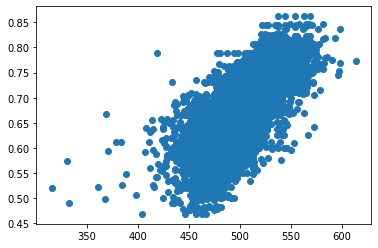

In [8]:
plt.plot( 'nu_nota_valor', 'idh_municipal', data=df, linestyle='none', marker='o')
plt.show()

Pandas Redshift | 2020-09-06 23:52:06,807 | numexpr.utils | INFO | NumExpr defaulting to 2 threads.


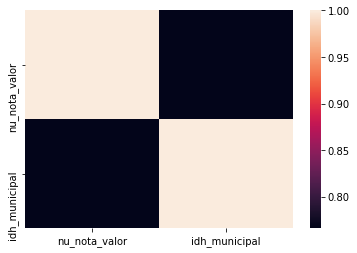

In [9]:
ax = sns.heatmap(corr)

### Extrair nota média e população

In [10]:
df = pr.redshift_to_pandas('''
select nu_nota_valor, populacao from view_agg_fat_enem vafe
left join staging_cidades sc
on vafe.co_municipio_prova = sc.codigo
order by nu_nota_valor
''')

### Calcular correlação

- Correlação de 0.16, o que indica que cidades com população maior possívelmente tem uma nota maior no Enem, porém a correlação é bem baixa.

In [11]:
corr = df.corr()
print(corr)

               nu_nota_valor  populacao
nu_nota_valor       1.000000   0.168258
populacao           0.168258   1.000000


### Plotar gráfico

- Gráficos apresentam uma correlação positiva entre IDH e  nota no enem

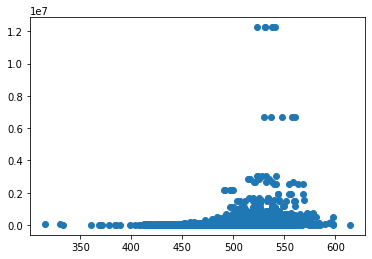

In [12]:
plt.plot( 'nu_nota_valor', 'populacao', data=df, linestyle='none', marker='o')
plt.show()

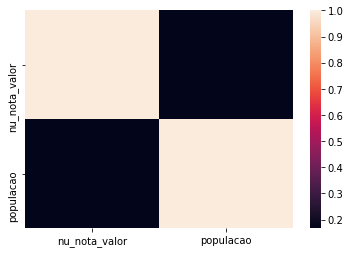

In [13]:
ax = sns.heatmap(corr)